In [3]:
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.font_manager import FontProperties
import datetime
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np

In [4]:
# 获取当前目录
current_directory = os.getcwd()

# 构建文件路径
file_path = os.path.join(current_directory, "merged_data_final.csv")

# 使用 pandas 的 read_csv() 函数读取 CSV 文件并创建 DataFrame
df = pd.read_csv(file_path)

df


C:\Users\Eason\AppData\Local\Temp\ipykernel_87800\2004348083.py:8: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid
0,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319912043,wow有舰长,NaN,NaN,0
1,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319960241,[https://i0.hdslb.com/bfs/live/abedc05607b70a8...,NaN,NaN,0
2,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320090560,点播 触电,NaN,NaN,0
3,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320127436,[https://i0.hdslb.com/bfs/live/752c09547574aeb...,NaN,NaN,0
4,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320381467,有睫毛刷嘛,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
12749345,2350559,菌烨tako,NaN,NaN,4,1659457018976,NaN,NaN,NaN,996
12749346,2350559,菌烨tako,NaN,NaN,4,1659124809320,NaN,NaN,NaN,996
12749347,2059591,性巴莎拉,NaN,NaN,4,1656072510180,NaN,NaN,NaN,996
12749348,11605312,青鸢Cyan-,娱乐,舞见,4,1664028253867,NaN,NaN,NaN,998


In [5]:
unique_uid_count = df["cUid"].nunique()
unique_uid_count

17566

In [7]:
message_count = df["message"].nunique()
message_count

3701308

In [5]:
def generate_cloud(kind):
    text_data = df[kind].astype(str)
    text_data = text_data.dropna()

    text = ' '.join(text_data.unique())

    font_path = 'ZiYuYongSongTi-2.ttf'

    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


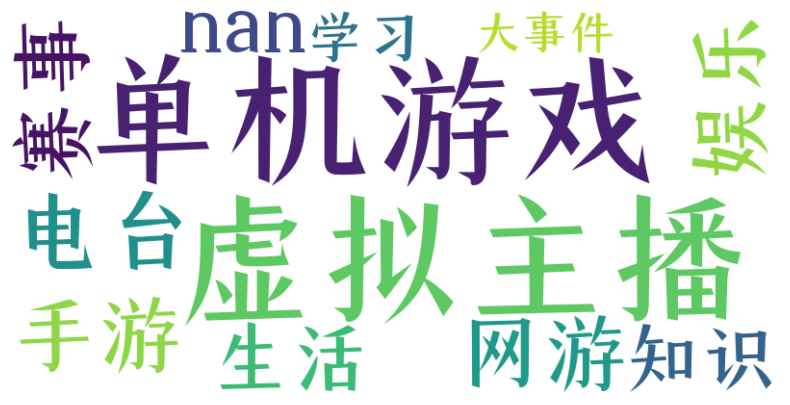

In [7]:
generate_cloud('cParentArea')

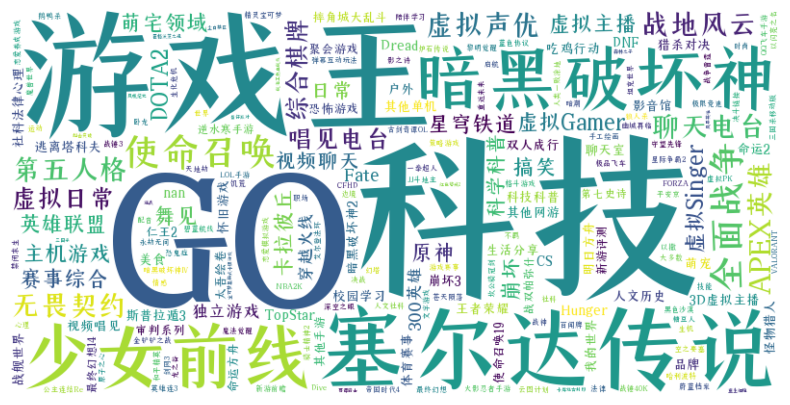

In [6]:
generate_cloud('cArea')

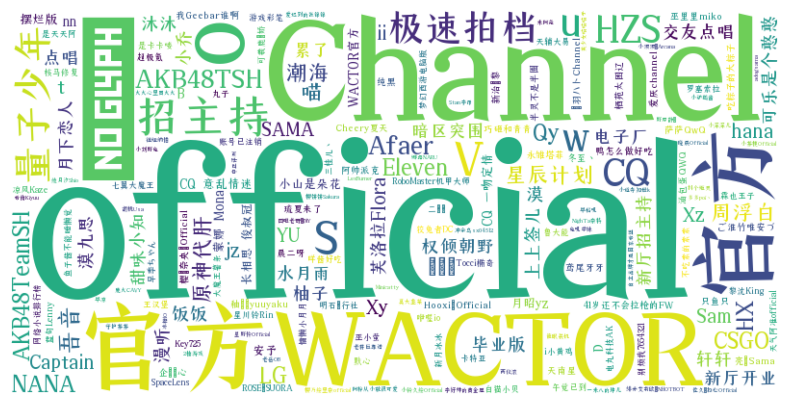

In [12]:
generate_cloud('cUname')

In [7]:
counts = df['cUname'].value_counts().sort_values(ascending=False)
counts = pd.DataFrame(counts)
counts

,cUname
眞白花音_Official,286404
七海Nana7mi,159791
老实憨厚的笑笑,119964
C酱です,113330
魔狼咪莉娅,108591
...,...
金戈药商白止,1
Endeavour♡,1
阿苒苒与富坚坚,1
宋书航呀-满月版,1


In [14]:
pay_list = df.groupby('uid')['price'].sum().sort_values(ascending=False)
pay_list = pd.DataFrame(pay_list)
pay_list['ranking'] = [i+1 for i in range(len(pay_list))]
pay_list.reset_index(inplace=True)
pay_list

,uid,price,ranking
0,145,1096405.60,1
1,203110,441959.20,2
2,2,345133.92,3
3,99,239476.60,4
4,202460,213422.60,5
...,...,...,...
34130,90316963,0.00,34131
34131,90316953,0.00,34132
34132,90316943,0.00,34133
34133,90316941,0.00,34134


In [15]:
pay_list[pay_list['price']>=400000]

,uid,price,ranking
0,145,1096405.6,1
1,203110,441959.2,2


In [16]:
me=df.merge(pay_list[pay_list['price']>=2000],on='uid')
me

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price_x,count,uid,price_y,ranking
0,1600113,萌爱moi,娱乐,舞见,4,1688320866439,NaN,NaN,NaN,101,3800.0,189
1,15049310,青稞芋泥陶可爱,娱乐,舞见,4,1687518744944,NaN,NaN,NaN,101,3800.0,189
2,1363457,米团团Miho,虚拟主播,虚拟日常,4,1686928323085,NaN,NaN,NaN,101,3800.0,189
3,6964745,有希小酱,娱乐,视频唱见,4,1686674056566,NaN,NaN,NaN,101,3800.0,189
4,23309612,我是娜娜啊啊啊,娱乐,视频聊天,4,1686674119025,NaN,NaN,NaN,101,3800.0,189
...,...,...,...,...,...,...,...,...,...,...,...,...
3598509,375504219,湊-阿库娅Official,NaN,NaN,0,1580995739000,探个头,NaN,NaN,995,2755.3,224
3598510,375504219,湊-阿库娅Official,NaN,NaN,0,1580995774000,准备道歉,NaN,NaN,995,2755.3,224
3598511,375504219,湊-阿库娅Official,NaN,NaN,0,1580995897000,SC大气,NaN,NaN,995,2755.3,224
3598512,375504219,湊-阿库娅Official,NaN,NaN,0,1580996089000,回家了回家了,NaN,NaN,995,2755.3,224


In [17]:
def generate_cloud(kind, price,type):
    me=df.merge(pay_list[pay_list['price']>=price],on='uid')
    text_data = me[me['type']==type][kind].astype(str)
    text_data = text_data.replace('nan',np.nan)
    text_data = text_data.dropna()
    print(text_data)

    text = ' '.join(text_data.unique())

    font_path = 'ZiYuYongSongTi-2.ttf'

    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

8236        虚拟主播
8237          娱乐
8238        虚拟主播
8239          赛事
8240        虚拟主播
            ... 
12749339      娱乐
12749340    单机游戏
12749341      娱乐
12749348      娱乐
12749349      娱乐
Name: cParentArea, Length: 4480415, dtype: object


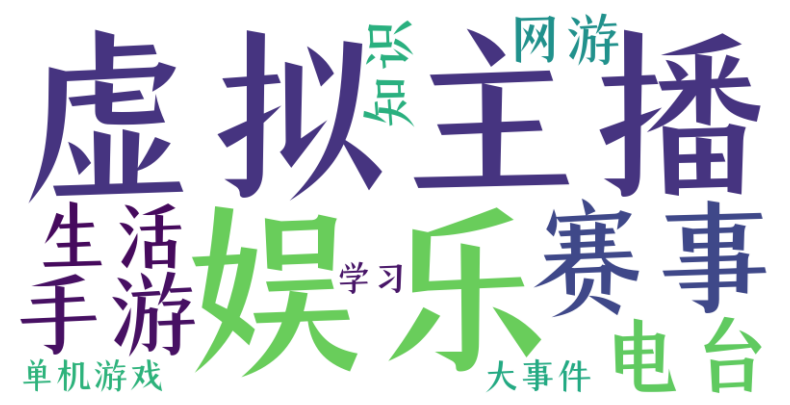

In [23]:
generate_cloud('cParentArea',0,4)

8236         虚拟Gamer
8237            萌宅领域
8238        虚拟Singer
8239            赛事综合
8240            虚拟日常
              ...   
12749339        萌宅领域
12749340        独立游戏
12749341        视频聊天
12749348          舞见
12749349          舞见
Name: cArea, Length: 4480415, dtype: object


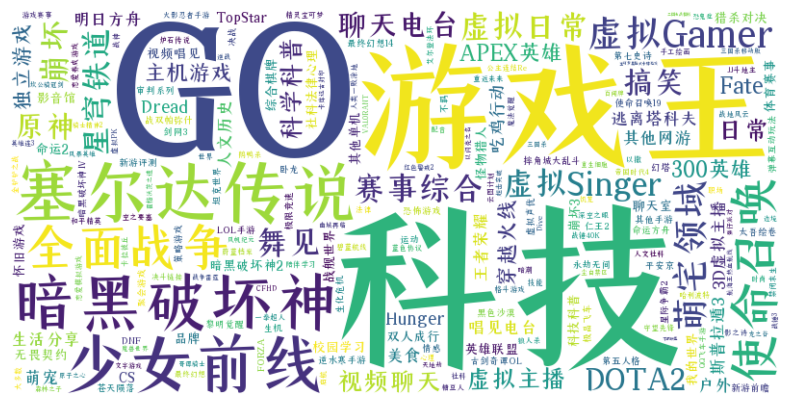

In [18]:
generate_cloud('cArea',0,4)

In [19]:
def d2d(d):
    timestamp_str = float(d) # 将字符串转换为整数或浮点数（如果是浮点数时间戳）
    timestamp = float(timestamp_str) / 1000 # 转换为以秒为单位的时间戳 # 使用 datetime 模块将时间戳转换为标准时间
    dt = datetime.datetime.fromtimestamp(timestamp) # 打印标准时间 print(dt)
    print(dt)

In [21]:

d2d(1689609850169)

2023-07-18 00:04:10.169000


In [22]:
df['cArea'].value_counts()

虚拟主播        1487699
虚拟日常         641309
主机游戏         530054
英雄联盟         367055
虚拟Singer     323849
             ...   
洛克王国              2
重返帝国              1
无主之地3             1
300大作战            1
鬼泣-巅峰之战           1
Name: cArea, Length: 347, dtype: int64